In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))

pandas version is 0.24.2.
numpy version is 1.16.5.
scikit-learn version is 0.20.3.
seaborn version is 0.9.0.
matplotlib version is 2.2.4.


In [2]:
training_data = pd.read_csv("EH-training-data.csv", names = range(0, 59))
training_labels = pd.read_csv("EH-training-labels.csv", names = range(0, 3))
testing_data = pd.read_csv("EH-testing-data.csv", names = range(0, 59))
testing_labels = pd.read_csv("EH-testing-labels.csv", names = range(0, 3))
print("This set has {} training_data points and {} features.".format(*training_data.shape))
print("This set has {} training_label points and {} features.".format(*training_labels.shape))
print("This set has {} testing_data points and {} features.".format(*testing_data.shape))
print("This set has {} testing_label points and {} features.".format(*testing_labels.shape))
#display(training_data)
#display(training_labels)
#display(testing_data)
#display(testing_labels)

This set has 274654 training_data points and 59 features.
This set has 506688 training_label points and 3 features.
This set has 211810 testing_data points and 59 features.
This set has 439161 testing_label points and 3 features.


<h3>Basic Stats. Author claims he normalized dataset for privacy reasons.</h3>

In [3]:
training_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
count,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.00000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.00000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000,274654.000000
mean,137327.500000,1.483204,2.336685,350.393521,1721.975285,37.532925,1.111417,1.696425,1.456407,0.337213,3.403613,4.227577,5.937125,0.311159,0.002057,770.473224,43.103279,30.217517,12.825173,3.376328,4.760448,4.176895,3.783939,0.898305,3.478023,36.30139,0.320352,0.040141,0.068490,0.011819,0.039876,0.037618,0.01913,0.027220,0.071038,0.020965,0.201373,0.237117,0.400569,0.336729,0.449886,0.235008,0.177074,0.117431,0.059981,0.110455,0.084015,0.188652,0.036581,0.021522,0.045097,0.143479,3.060094,5.708379,6.360934,5.176888,5.072466,-91.037611,38.297782
std,79285.924754,0.499719,1.722036,842.266552,99.570376,10.626110,1.320764,0.791909,0.662386,0.887937,1.342585,1.168355,17.199464,0.462968,0.045309,975.292766,12.015969,9.295457,18.015589,1.529659,1.596023,1.722220,1.796954,0.302248,2.867129,6.32139,0.466613,0.196291,0.252585,0.108069,0.195667,0.190271,0.13698,0.162723,0.256890,0.143266,0.401027,0.425315,0.490015,0.472592,0.497483,0.424005,0.381732,0.321934,0.237452,0.313457,0.277411,0.391233,0.187730,0.145116,0.207517,0.350561,1.834048,1.136248,0.908374,1.302364,1.165751,28.034269,8.739515
min,1.000000,1.000000,-3.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-166.967500,-45.880000
25%,68664.250000,1.000000,3.000000,30.000000,1650.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,200.000000,34.000000,23.000000,0.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,6.000000,4.000000,4.000000,-111.922300,34.079900
50%,137327.500000,1.000000,3.000000,60.000000,1720.000000,35.000000,1.000000,2.000000,1.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.000000,457.000000,40.000000,28.000000,0.000000,4.000000,5.000000,4.000000,4.000000,1.000000,3.000000,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,7.000000,5.000000,5.000000,-87.621900,39.663600
75%,205990.750000,2.000000,3.000000,120.000000,1800.000000,44.000000,2.000000,2.000000,2.000000,0.000000,5.000000,5.000000,1.000000,1.000000,0.000000,957.000000,50.000000,35.000000,31.000000,4.000000,6.000000,5.000000,5.000000,1.000000,5.000000,41.00000,1.000

<h3>Checking for correlation between features. Might be useful for PCA. </h3>

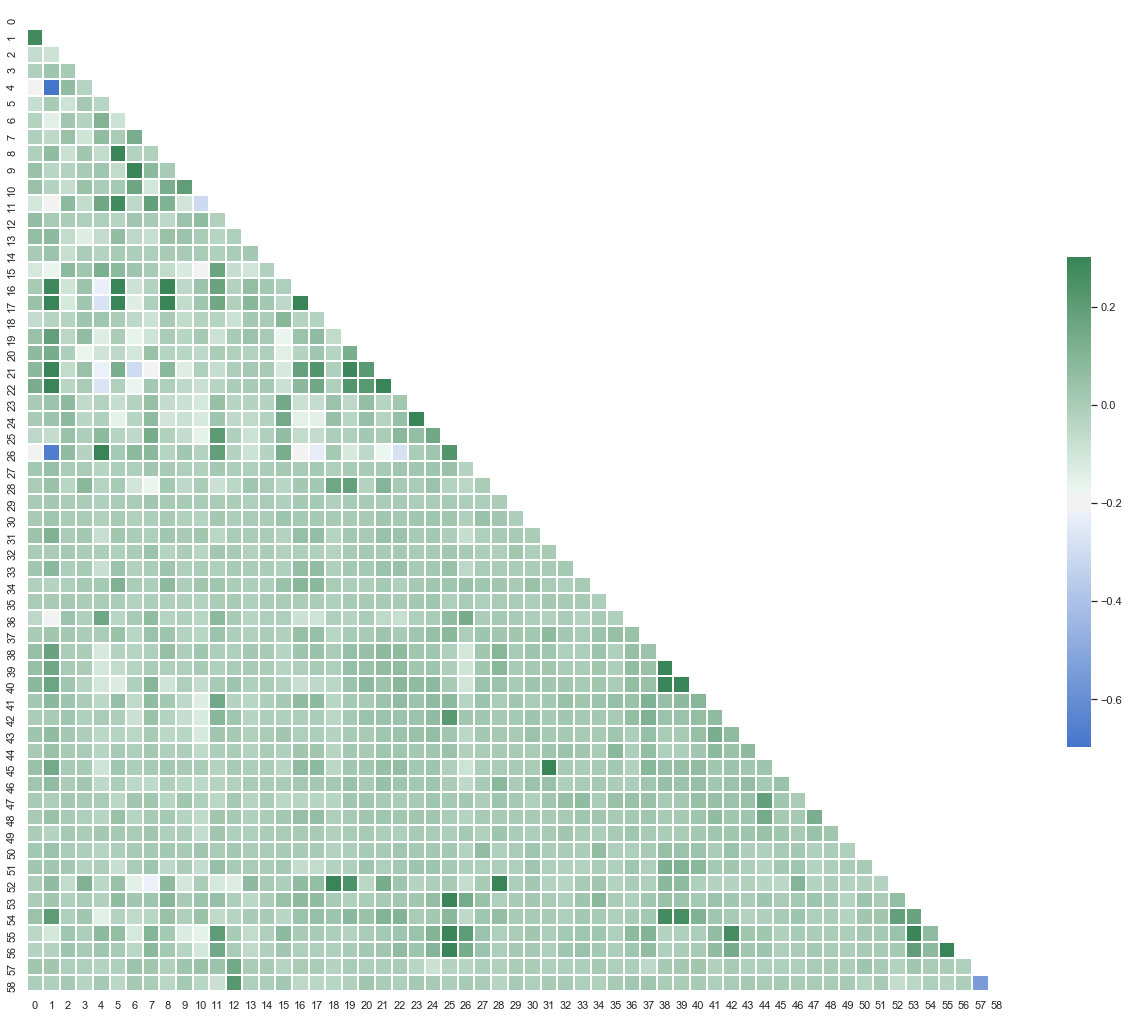

In [4]:
sns.set(style="white")
corr = training_data.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (22, 18))
cmap = sns.diverging_palette(255, 140, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, 
            square = True, xticklabels = True, yticklabels = True, linewidths = 1, cbar_kws = {"shrink": .5}, ax = ax)

<h3>This is good to see the frequncies and to see differences in population or responses per feature.</h3>

In [5]:
def features_hist(data):
    """This method ouputs a histograms of features."""
    for i in data.columns:
        stuff = pd.DataFrame(data = data[i], columns = [i])
        stuff.plot(kind = 'hist', bins = 10)

In [6]:
#features_hist(training_data)

In [7]:
display(training_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1,2,3,1,1620,26,4,1,2,4,5,4,63,0,0,61,33,23,0,7,4,4,6,1,11,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,7,5,6,-117.9970,33.8005
1,2,2,3,200,1720,38,3,2,1,0,2,5,1,0,0,399,51,35,0,4,4,3,6,1,2,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,6,6,6,5,-73.8584,40.8424
2,3,2,3,120,1750,26,3,3,1,0,3,4,1,0,0,728,35,24,35,2,6,4,7,1,12,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,4,5,7,5,5,-98.4992,29.6647
3,4,1,3,200,1850,39,0,1,2,0,2,5,1,0,0,260,39,25,0,4,2,5,5,1,4,27,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,5,6,4,3,-72.4706,42.1729
4,5,1,3,200,1880,44,1,2,2,0,2,5,1,0,0,1456,46,30,0,2,7,2,2,1,7,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,7,6,4,5,-76.3964,42.9142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274649,274650,2,3,60,1770,32,2,2,1,0,3,3,1,1,0,393,41,28,0,4,4,5,5,1,12,31,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,3,3,6,4,4,-93.4906,45.0012
274650,274651,2,3,0,1750,31,2,2,1,1,3,3,1,0,0,450,38,28,0,4,4,4,6,1,8,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,7,6,3,-90.6758,40.4592
274651,274652,2,3,60,1670,28,1,2,1,1,3,4,39,0,0,271,50,28,2,4,4,4,6,1,8,41,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,7,7,5,6,-79.3650,43.6518
274652,274653,2,3,60,1670,56,0,3,2,0,4,3,1,0,0,78,73,50,0,5,6,7,5,0,0,27,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,7,5,7,3,3,-119.2161,34.2712


In [8]:
display(training_labels)

,0,1,2
0,1,7,11883
1,1,7,257487
2,0,7,239226
3,0,7,82094
4,0,7,226461
...,...,...,...
506683,0,91182,63939
506684,0,91182,40019
506685,0,91182,20632
506686,0,91182,20372


<h2>Creating theTraining Dataset...again...</h2>

<h4>I had to reimport the dataset to do query manipulations. This is to prep for Machine Learning Algorithms.</h4>

In [9]:
import helper_functions as hf

In [10]:
training_data = hf.generate_array('EH-training-data.csv')
training_labels = hf.generate_labels('EH-training-labels.csv')
testing_data = hf.generate_array('EH-testing-data.csv')
testing_label = hf.generate_labels('EH-testing-labels.csv')
print("Training data: " + str(len(training_data)))
print("Training labels: " + str(len(training_labels)))
print("Testing data: " + str(len(testing_data)))
print("Testing labels: " + str(len(testing_labels)))

Training data: 274654
Training labels: 506688
Testing data: 211810
Testing labels: 439161


In [11]:
#training_data

In [12]:
#training_labels

In [13]:
#testing_data

In [14]:
#testing_labels

In [15]:
training_data = [hf.collapse(training_data[int(i[1]) - 1], training_data[int(i[2]) - 1]) for i in training_labels]

In [16]:
#training_data

In [17]:
output = []
for i in training_labels:
    output.append(int(i[0]))

In [18]:
#output

<h3>Displaying Data...pretty format.</h3>

In [19]:
training_data_df = pd.DataFrame(data = training_data)
display(training_data_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429,11883,2,3,3000,1600,38,1,1,2,0,2,4,1,0,0,276,43,35,45,4,4,3,3,1,4,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,5,7,6,7,6,-71.0581,42.4299
1,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429,257487,2,3,30,1620,31,1,3,1,0,2,5,1,0,0,488,41,32,0,5,7,7,7,1,8,43,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,6,4,6,6,-74.0008,40.7429
2,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429,239226,2,2,120,1650,38,2,1,2,0,3,4,1,0,0,117,51,35,0,4,1,4,1,1,3,31,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,7,7,1,4,-73.8849,40.8112
3,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429,82094,2,3,200,1520,32,2,0,1,0,2,7,1,0,0,396,41,28,21,1,5,6,6,1,3,41,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,7,7,6,6,-97.7519,31.1286
4,7,1,3,30,1900,39,1,1,2,1,2,5,1,0,0,171,35,27,0,4,4,4,4,1,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,-74.0008,40.7429,226461,2,3,200,1620,32,1,2,1,0,1,4,1,0,0,1283,41,31,0,1,7,7,7,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,5,7,5,6,-74.0886,40.7027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506683,91182,2,3,3000,1600,28,0,1,1,0,5,3,1,0,0,156,35,28,8,4,6,6,3,1,5,32,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2,5,7,4,5,-75.9796,40.9607,63939,1,3,60,1650,32,0,2,1,0,5,4,1,0,0,1530,33,23,46,1,4,3,4,1,7,49,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,6,7,7,7,7,-74.4602,40.5545
506684,91182,2,3,3000,1600,28,0,1,1,0,5,3,1,0,0,156,35,28,8,4,6,6,3,1,5,32,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2,5,7,4,5,-75.9796,40.9607,40019,1,3,1,1820,28,1,2,1,0,4,5,1,0,0,641,30,20,0,4,4,4,5,1,1,30,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,4,5,6,4,4,-74.4602,40.5545
506685,91182,2,3,3000,1600,28,0,1,1,0,5,3,1,0,0,156,35,28,8,4,6,6,3,1,5,32,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2,5,7,4,5,-75.9796,40.9607,20632,1,3,30,1720,35,0,1,1,0,4,4,1,0,0,2428,37,25,8,1,6,5,3,1,4,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,3,3,-74.4602,40.5545
506686,91182,2,3,3000,1600,28,0,1,1,0,5,3,1,0,0,156,35,28,8,4,6,6,3,1,5,32,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2,5,7,4,5,-75.9796,40.9607,20372,1,3,0,1880,34,0,2,1,0,5,3,1,0,0,1020,40,21,29,4,4,4,4,1,2,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,7,6,4,-74.4602,40.5545


In [20]:
training_labels_df = pd.DataFrame(data = training_labels)
display(training_labels_df)

,0,1,2
0,1,7,11883
1,1,7,257487
2,0,7,239226
3,0,7,82094
4,0,7,226461
...,...,...,...
506683,0,91182,63939
506684,0,91182,40019
506685,0,91182,20632
506686,0,91182,20372


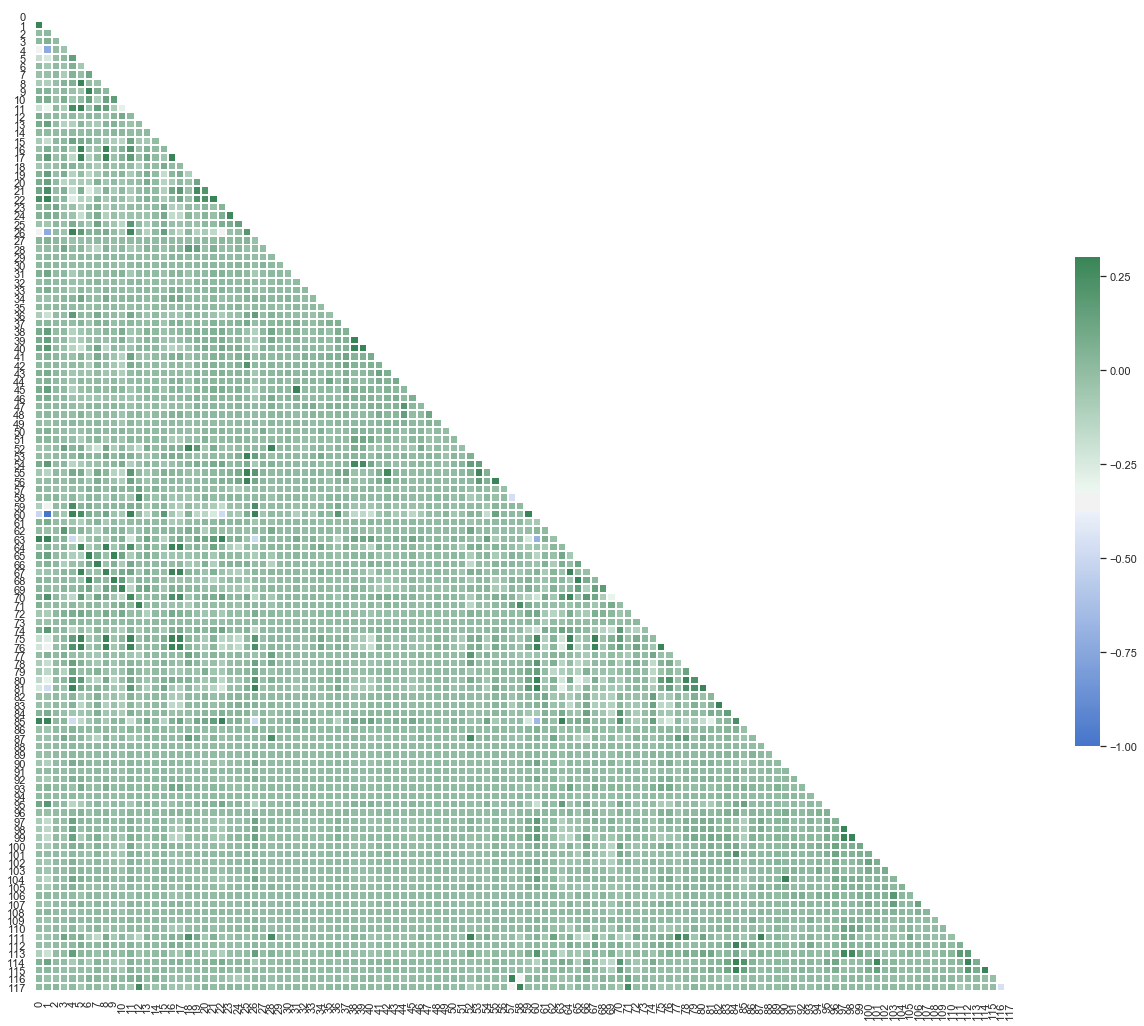

In [21]:
sns.set(style="white")
corr = training_data_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (22, 18))
cmap = sns.diverging_palette(255, 140, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, 
            square = True, xticklabels = True, yticklabels = True, linewidths = 1, cbar_kws = {"shrink": .5}, ax = ax)

In [22]:
X, y = np.asarray(training_data), np.asarray(output)

In [23]:
print(X.shape)
print(y.shape)

(506688L, 118L)
(506688L,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
for i in [.125, .25, .375, .50, .625, .75, .875]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print("Test on " + str(i*100) + "% data")
    print("Tested on: %d, mislabelled points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    num_1 = (y_test != y_pred).sum()
    num_2 = X_test.shape[0]
    print("Error: %f" % (float(num_1)/num_2*100))
    print("f1_score: ")
    print(f1_score(y_test, y_pred, average=None))
    print("===================================")

Test on 12.5% data
Tested on: 63336, mislabelled points: 8466
Error: 13.366806
f1_score: 
[0.92818607 0.03620219]
Test on 25.0% data
Tested on: 126672, mislabelled points: 16808
Error: 13.268915
f1_score: 
[0.92877302 0.03213175]
Test on 37.5% data
Tested on: 190008, mislabelled points: 24150
Error: 12.709991
f1_score: 
[0.93206751 0.01492903]
Test on 50.0% data
Tested on: 253344, mislabelled points: 32060
Error: 12.654730
f1_score: 
[0.93239767 0.01183578]
Test on 62.5% data
Tested on: 316680, mislabelled points: 40166
Error: 12.683466
f1_score: 
[0.93223444 0.01166339]
Test on 75.0% data
Tested on: 380016, mislabelled points: 48228
Error: 12.691045
f1_score: 
[0.93219186 0.01151875]
Test on 87.5% data
Tested on: 443352, mislabelled points: 57289
Error: 12.921787
f1_score: 
[0.9308357  0.01904077]


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
for i in [.125, .25, .375, .50, .625, .75, .875]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    neigh = KNeighborsClassifier(n_neighbors=20)
    neigh.fit(X_train, y_train)
    neighborhood_pred = neigh.predict(X_test)
    print("Test on " + str(i*100) + "% data")
    print("Tested on: %d, mislabelled points: %d" % (X_test.shape[0], (y_test != neighborhood_pred).sum()))
    num_1 = (y_test != neighborhood_pred).sum()
    num_2 = X_test.shape[0]
    print("Error: %f" % (float(num_1)/num_2*100))
    print(f1_score(y_test, neighborhood_pred, average=None))
    print("===================================")
    

Test on 12.5% data
Tested on: 63336, mislabelled points: 7848
Error: 12.391057
[0.93395274 0.        ]
Test on 25.0% data
Tested on: 126672, mislabelled points: 15604
Error: 12.318429
[0.93436527 0.        ]
Test on 37.5% data
Tested on: 190008, mislabelled points: 23340
Error: 12.283693
[9.34561726e-01 1.71350240e-04]
Test on 50.0% data
Tested on: 253344, mislabelled points: 31235
Error: 12.329086
[9.34304481e-01 6.40266351e-05]
Test on 62.5% data
Tested on: 316680, mislabelled points: 39110
Error: 12.350006
[9.34185506e-01 1.02265174e-04]
Test on 75.0% data
Tested on: 380016, mislabelled points: 46873
Error: 12.334481
[9.34273940e-01 4.26666667e-05]
Test on 87.5% data
Tested on: 443352, mislabelled points: 54710
Error: 12.340082
[0.93424231 0.        ]


C:\Users\gllgs\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
